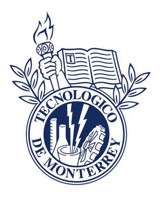

## Instituto Tecnológico y de Estudios Superiores de Monterrey

## Proyecto Integrador

## Dr. Luis Eduardo Falcón Morales

<table text-align="left">
  <tr>
    <th style="text-align:center;">Name</th>
    <th style="text-align:center;">Student ID</th>
  </tr>
  <tr>
    <td style="text-align:left;">Estefania Abigail Castro Belmont</td>
    <td style="text-align:left;">A01332636</td>
  </tr>
  <tr>
    <td style="text-align:left;">Roberto Carlos Avelar Sigüenza</td>
    <td style="text-align:left;">A01016798</td>
  </tr>
  <tr>
    <td style="text-align:left;">Nicolas Mojica Gómez</td>
    <td style="text-align:left;">A01794354</td>
  </tr>
</table>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### **Ingeniería de características (FE - Feature Engineering)**

A. Se aplicarán operaciones comunes para convertir los datos crudos del mundo real, en un conjunto de variables útiles para el aprendizaje automático. El procesamiento puede incluir: <br>

*   Generación de nuevas características
*   Discretización o binning
*   Codificación (ordinal, one hot,…)
*   Escalamiento (normalización, estandarización, min – max,…)
*   Transformación (logarítmica, exponencial, raíz cuadrada, Box – Cox, Yeo – Johnson,…)

Todas las decisiones y técnicas empleadas deben ser justificadas

Primero revisamos los campos que tenemos en nuesto conjunto de datos

In [3]:
# Cargamos el conjunto de datos en un DataFrame de pandas
data = pd.read_excel('/content/sample_data/descriptivos oracle.xlsx')

In [ ]:
# Descripción general de la forma y los tipos de datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Profesión    300 non-null    object
 1   Género       300 non-null    object
 2   Desempeño    300 non-null    object
 3   Descriptivo  300 non-null    object
dtypes: object(4)
memory usage: 9.5+ KB


In [4]:
data.head(2)

,Profesión,Género,Desempeño,Descriptivo
0,Especialistas en soporte técnico,Femenino,Regular,Ana es una especialista en soporte técnico con...
1,Consultores de tecnología,Masculino,Estándar,Juan es un consultor de tecnología con un dese...


Al explorar nuestro conjunto de datos algunas operaciones de ingeniería de características que podemos aplicar son las siguientes:

**Profesión:** Aplicar **codificación one-hot** para convertir las diferentes profesiones en variables binarias.

**Género:** Aplicar **codificación binaria** para convertir el género en una variable numérica (por ejemplo, 0 para masculino y 1 para femenino).

**Desempeño:** Aplicar **transformación** mediante la asignación de valores numéricos a los diferentes niveles de desempeño (por ejemplo, 0 para Malo, 1 para Regular, 2 para Estándar y 3 para Sobresaliente).

**Descriptivo:** En este caso podemos aplicar más cosas:

*   Generación de nuevas características: Calcular la longitud del texto (número de palabras o caracteres).
*   Transformación: Aplicar técnicas de procesamiento de lenguaje natural (NLP) para extraer características útiles, como contar la frecuencia de palabras clave específicas.
*   Codificación: Convertir el texto en una representación numérica mediante técnicas como Word Embeddings.



B. Además, se utilizarán métodos de filtrado para la selección de características y técnicas de extracción de características, permitiendo reducir los requerimientos de almacenamiento, la complejidad del modelo y el tiempo de entrenamiento. Los ejemplos siguientes son ilustrativos, pero no exhaustivos, de lo que se podría aplicar: <br>
*   Umbral de varianza
*   Correlación
*   Chi-cuadrado
*   ANOVA
*   Análisis de componentes principales (PCA)
*   Análisis factorial (FA)

Es necesario fundamentar los métodos ejecutados.



Las características de nuestro conjunto de datos son principalmente texto (como el campo "Descriptivo") y algunas son categóricas (como "Profesión" y "Género"). En este caso, las técnicas de selección y extracción de características como el umbral de varianza, la correlación, el chi-cuadrado y ANOVA no son aplicables. En su lugar, consideraramos algunas técnicas específicas para datos de texto, como la extracción de características mediante TF-IDF (Term Frequency-Inverse Document Frequency) o modelos de incrustación de palabras (word embeddings) para el campo "Descriptivo".

Despues de investigar cómo funciona TF-IDF (Term Frequency-Inverse Document Frequency) encontramos la siguiente definición:



**Frecuencia de término (TF - Term Frequency)**: Calcula la frecuencia con la que aparece una palabra en un documento. Se calcula dividiendo el número de veces que aparece la palabra en el documento entre el total de palabras en el documento. La idea detrás de TF es que si una palabra aparece con frecuencia en un documento, es importante para ese documento.

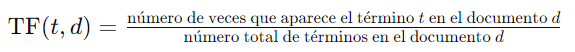

In [17]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer


documentos = data['Descriptivo'].tolist()

# Inicializar el vectorizador de conteo
vectorizador = CountVectorizer()

# Ajustar el vectorizador y transformar los documentos en una matriz de términos
matriz_tf = vectorizador.fit_transform(documentos)

# Obtener los términos (palabras) detectados
terminos = vectorizador.get_feature_names_out()

# Obtener el total de palabras en cada documento
total_palabras_por_documento = matriz_tf.sum(axis=1)

# Calcular la frecuencia de término (TF) para cada término en cada documento
frecuencia_termino = matriz_tf / total_palabras_por_documento

# Crear un DataFrame para almacenar los resultados
resultados = pd.DataFrame(frecuencia_termino.toarray(), columns=terminos)

# Mostrar el DataFrame con la frecuencia de término (TF)
print("Frecuencia de término (TF):")
print(resultados)


Frecuencia de término (TF):
      32  abierta  abierto  aborda  abordando   abordar  abrirán  abrumada  \
0    0.0      0.0      0.0     0.0        0.0  0.000000      0.0       0.0   
1    0.0      0.0      0.0     0.0        0.0  0.000000      0.0       0.0   
2    0.0      0.0      0.0     0.0        0.0  0.000000      0.0       0.0   
3    0.0      0.0      0.0     0.0        0.0  0.005319      0.0       0.0   
4    0.0      0.0      0.0     0.0        0.0  0.000000      0.0       0.0   
..   ...      ...      ...     ...        ...       ...      ...       ...   
295  0.0      0.0      0.0     0.0        0.0  0.000000      0.0       0.0   
296  0.0      0.0      0.0     0.0        0.0  0.000000      0.0       0.0   
297  0.0      0.0      0.0     0.0        0.0  0.000000      0.0       0.0   
298  0.0      0.0      0.0     0.0        0.0  0.000000      0.0       0.0   
299  0.0      0.0      0.0     0.0        0.0  0.000000      0.0       0.0   

     académica  académico  ...  éti

**Frecuencia inversa de documento (IDF - Inverse Document Frequency)**: Calcula la importancia de una palabra en todo el corpus. Se calcula tomando el logaritmo del cociente entre el número total de documentos en el corpus y el número de documentos que contienen la palabra. La idea detrás de IDF es penalizar las palabras que aparecen en muchos documentos y, por lo tanto, son menos importantes para distinguir documentos.

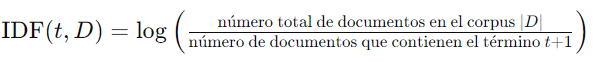

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

documentos = data['Descriptivo'].tolist()

# Inicializar el vectorizador TF-IDF
vectorizador_tfidf = TfidfVectorizer()

# Ajustar el vectorizador y transformar los documentos en una matriz TF-IDF
matriz_tfidf = vectorizador_tfidf.fit_transform(documentos)

# Obtener el número total de documentos en el corpus
num_documentos_total = len(documentos)

# Calcular el número de documentos que contienen cada palabra
num_documentos_contienen_palabra = np.array((matriz_tfidf > 0).sum(0)).flatten()

# Calcular IDF para cada palabra
idf = np.log(num_documentos_total / (1 + num_documentos_contienen_palabra))

# Obtener los términos (palabras) detectados
terminos = vectorizador_tfidf.get_feature_names_out()

# Mostrar IDF de cada término
print("IDF de cada término:")
for i, termino in enumerate(terminos):
    print(f"{termino}: {idf[i]}")


IDF de cada término:
32: 5.0106352940962555
abierta: 3.7578723256008875
abierto: 5.0106352940962555
aborda: 4.605170185988092
abordando: 4.605170185988092
abordar: 2.371577964480997
abrirán: 5.0106352940962555
abrumada: 5.0106352940962555
académica: 3.0647251450409425
académico: 5.0106352940962555
accesible: 3.912023005428146
acciones: 4.0943445622221
acción: 5.0106352940962555
acertadas: 3.624340932976365
acompañamiento: 5.0106352940962555
actitud: 0.616186139423817
actitudes: 5.0106352940962555
activa: 5.0106352940962555
activamente: 3.912023005428146
actividades: 5.0106352940962555
activo: 1.118814995985629
activos: 4.605170185988092
actuación: 5.0106352940962555
actual: 2.6127400212978853
actuales: 3.912023005428146
actualidad: 5.0106352940962555
actualización: 2.7593434954897607
actualizada: 2.995732273553991
actualizadas: 5.0106352940962555
actualizado: 2.70805020110221
actualizarse: 4.31748811353631
actualizándose: 5.0106352940962555
actualmente: 3.4011973816621555
actuando: 5.0

**TF-IDF**: Combina la frecuencia de término (TF) y la frecuencia inversa de documento (IDF) multiplicando TF y IDF juntos. El resultado es una puntuación que representa la importancia de una palabra en un documento dentro del corpus.

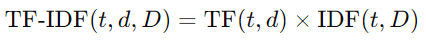

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

documentos = data['Descriptivo'].tolist()

# Inicializar el vectorizador TF-IDF
vectorizador_tfidf = TfidfVectorizer()

# Ajustar el vectorizador y transformar los documentos en una matriz TF-IDF
matriz_tfidf = vectorizador_tfidf.fit_transform(documentos)

# Obtener los términos (palabras) detectados
terminos = vectorizador_tfidf.get_feature_names_out()

# Crear un DataFrame para almacenar los resultados
resultados = pd.DataFrame(matriz_tfidf.toarray(), columns=terminos)

# Mostrar el DataFrame con TF-IDF combinado
print("TF-IDF combinado:")
print(resultados)


TF-IDF combinado:
      32  abierta  abierto  aborda  abordando   abordar  abrirán  abrumada  \
0    0.0      0.0      0.0     0.0        0.0  0.000000      0.0       0.0   
1    0.0      0.0      0.0     0.0        0.0  0.000000      0.0       0.0   
2    0.0      0.0      0.0     0.0        0.0  0.000000      0.0       0.0   
3    0.0      0.0      0.0     0.0        0.0  0.074646      0.0       0.0   
4    0.0      0.0      0.0     0.0        0.0  0.000000      0.0       0.0   
..   ...      ...      ...     ...        ...       ...      ...       ...   
295  0.0      0.0      0.0     0.0        0.0  0.000000      0.0       0.0   
296  0.0      0.0      0.0     0.0        0.0  0.000000      0.0       0.0   
297  0.0      0.0      0.0     0.0        0.0  0.000000      0.0       0.0   
298  0.0      0.0      0.0     0.0        0.0  0.000000      0.0       0.0   
299  0.0      0.0      0.0     0.0        0.0  0.000000      0.0       0.0   

     académica  académico  ...  ético  éticos

# Conculsión

En esta fase de la metodología CRISP se prepararon los datos. Debido a que los datos con los que trabajamos son descriptivos, se tuvieron que pasar a binarios o escalas. Se decidió utilizar distintas técnicas, para poder obtener las características necesarias para trabajar con los datos. 

Técnicas:

- One-hot encoding: Se utilizó la codificación one-hot para convertir las diferentes profesiones en variables binarias

- Codificación binaria: La codificación binaria para convertir el género en una variable numérica (por ejemplo, 0 para masculino y 1 para femenino).

- Ordinal Encoding: se aplicó la transformación mediante la asignación de valores numéricos a los diferentes niveles de desempeño (por ejemplo, 0 para Malo, 1 para Regular, 2 para Estándar y 3 para Sobresaliente). 

Finalmente se usó  TF-IDF para combinar la frecuencia de término (TF) y la frecuencia inversa de documento (IDF) multiplicando TF y IDF juntos. El resultado es una puntuación que representa la importancia de una palabra en un documento dentro del corpus.
Al obtener las características anteriormente mencionadas podemos utilizar los datos para obtener mayor información. Los análisis que consideramos de mayor importancia son lo que nos permitan vislumbrar que tipo de relación hay; por ejemplo, entre los perfiles sobresaliente, su sexo y las palabras que se utiliza para describir a los aplicantes. El conocer cómo se comportan las palabras en relación con el sexo de los aplicantes nos permitirá disernir entre CV que son de mujeres y hombres. Debido a que los hombres y mujeres utilizan distintas palabras, el conocer cuáles son predominantemente de hombres o mujeres ayudará a crear una descripción de CV libre de sesgo de sexo. 

Para poder crear limpiar las descripciones de los aplicantes, de forma tal que no haya sesgo de sexo, queremos utilizar detalladamente las características predominantes dentro de las descripciones de cada sexo para así conocer cuáles son las características de cada uno de ellos (femenino o masculino). Al usar las palabras más comunes de cada sexo podremos averiguar si hay palabras más comunes en perfiles femeninos que en los másculinos y viceversa. Además, podremos limpiar más detalladamente aquellos artículos o adjetivos que descubrean el sexo del aplicante. De esta forma podremos eliminar por completo palabras que revelen de forma directa el sexo del aplicante, como aquellas que parecen indicar de forma indirecta cuál es el sexo del mismo. Con lo anterior se podrá crear un proceso de selección de personal más justo y equitativo, libre de sesgos de género.

# Referencias

MBA USP ESALQ. (2022). Metodología CRISPR. https://blog.mbauspesalq.com/es/2022/05/31/crisp-dm-las-6-etapas-de-la-metodologia-del-futuro/#:~:text=%E2%80%9CLas%20tres%20etapas%20tienen%20como,de%20los%20datos%E2%80%9D%2C%20describe.

Galli, S. (2022). Python Feature Engineering Cookbook. Packt Publishing. https://learning.oreilly.com/library/view/python-feature-engineering/9781804611302/B18894_03.xhtmlLinks to an external site.

ESIC. (2023). ¿Qué es la codificación de datos? tipos y ejemplos. https://www.esic.edu/rethink/marketing-y-comunicacion/que-es-codificacion-datos-tipos-ejemplos-c#:~:text=1.,en%20sistemas%20digitales%20de%20computadoras.

Cheng, R. (2023). Understanding TF-IDF: A Traditional Approach to Feature Extraction in NLP. https://towardsdatascience.com/understanding-tf-idf-a-traditional-approach-to-feature-extraction-in-nlp-a5bfbe04723f

Wohlwend, B. (2023). Converting Categorical Data into Numerical Form: A Practical Guide for Data Science. Medium. https://medium.com/@brandon93.w/converting-categorical-data-into-numerical-form-a-practical-guide-for-data-science-99fdf42d0e10#:~:text=One%20common%20method%20is%20to,with%20their%20corresponding%20numerical%20labels.